# Produzione industriale

<img src="../media/produzione_industriale.png" width="500">


Fonte: _Luigi dell’Olio. 2025. «Innovazione e distretti Le eccellenze nascoste del made in Italy». la Repubblica Affari & Finanza, 7 luglio 2025._


## ricreare questo grafico utilizzando i dati Eurostat.

### Il grafico mostra:

* **Indice della produzione industriale** (base 2021=100)
* **Periodo**: gennaio 2020 – aprile 2025
* **Linee**:

  * Nera = valore mensile
  * Rossa = media mobile a 3 mesi


### Passaggi per rifarlo con dati Eurostat:

1. **Scaricare il dataset Eurostat** giusto:

   * Codice: `STS_INPR_M`
   * Indicatori: "Production in industry, total" (`I15`),
   * Frequenza: mensile
   * Paese: Italia
   * Base: 2021 = 100 (già disponibile tra le opzioni di normalizzazione)

2. **Pulizia dati**:

   * Filtrare la serie `I15` per l’Italia (`geo = IT`)
   * Frequenza mensile
   * Periodo: `2020-01` a `2025-04`

3. **Creare le due curve**:

   * `Indice mensile` = valori originali
   * `Media mobile a 3 mesi` = `.rolling(3).mean()`

4. **Plot con stile simile**:

   * Asse y: da 50 a 110
   * Asse x: anni con tick su gennaio
   * Colori: nero e rosso

In [1]:
import pandas as pd
import sys
sys.path.append("D:/PKM/Github/Eurostat/codice")  # Aggiunge il path dove si trova il modulo
from eurostat_utils import fetch_eurostat_data # questa è la mia funzione per estrarre i json

df = fetch_eurostat_data("sts_inpr_m", {
    "geo": "IT",
    "unit": "I21",
    "s_adj": "CA", # NSA, CA
    "nace_r2": ["B-D"],
})

In [2]:
df.sample()

,freq_code,freq_label,indic_bt_code,indic_bt_label,nace_r2_code,nace_r2_label,s_adj_code,s_adj_label,unit_code,unit_label,geo_code,geo_label,time_code,time_label,value,time
411,M,Monthly,PRD,Production (volume),B-D,Mining and quarrying; manufacturing; electrici...,CA,"Calendar adjusted data, not seasonally adjuste...",I21,"Index, 2021=100",IT,Italy,2024-04,2024-04,93.5,2024-04-01


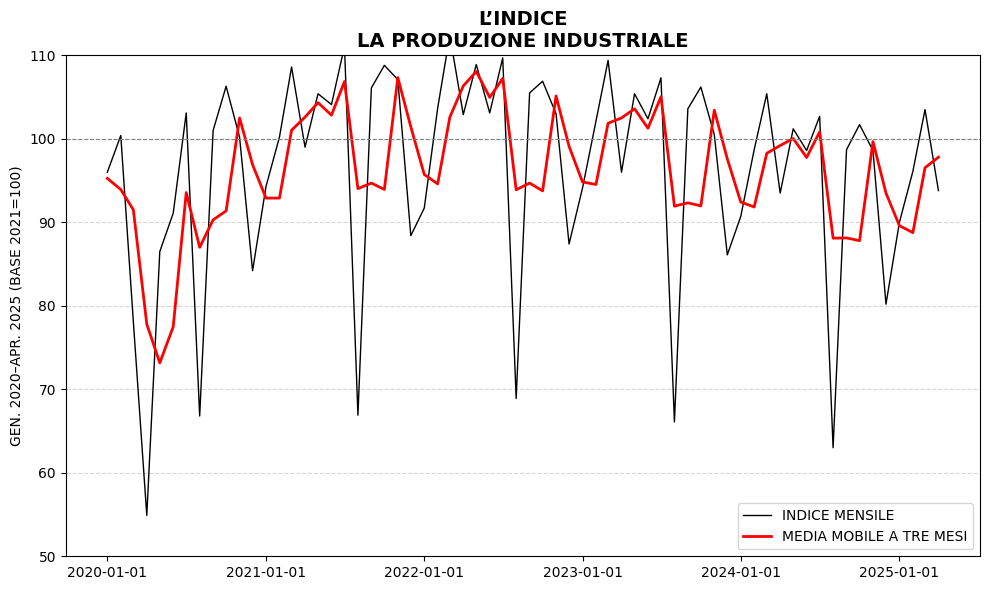

In [3]:
import matplotlib.pyplot as plt

# Conversione colonna tempo (se non già datetime)
df["time"] = pd.to_datetime(df["time"], format="%Y-%m")

# Ordinamento e indicizzazione
df = df.sort_values("time").set_index("time")

# Calcolo media mobile a 3 mesi
df["media_mobile"] = df["value"].rolling(3).mean()


# Filtro periodo
df = df["2020-01":"2025-04"]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df.index, df["value"], color="black", linewidth=1, label="INDICE MENSILE")
plt.plot(df.index, df["media_mobile"], color="red", linewidth=2, label="MEDIA MOBILE A TRE MESI")
plt.axhline(100, color="gray", linestyle="--", linewidth=0.8)
plt.ylim(50, 110)
plt.title("L’INDICE\nLA PRODUZIONE INDUSTRIALE", fontsize=14, weight="bold")
plt.ylabel("GEN. 2020–APR. 2025 (BASE 2021=100)")
plt.xticks(pd.date_range(start="2020-01", end="2025-05", freq="YS"), rotation=0)
plt.grid(True, axis="y", linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()


In [19]:
df.columns

Index(['freq_code', 'freq_label', 'indic_bt_code', 'indic_bt_label',
       'nace_r2_code', 'nace_r2_label', 's_adj_code', 's_adj_label',
       'unit_code', 'unit_label', 'geo_code', 'geo_label', 'time_code',
       'time_label', 'value', 'media_mobile'],
      dtype='object')

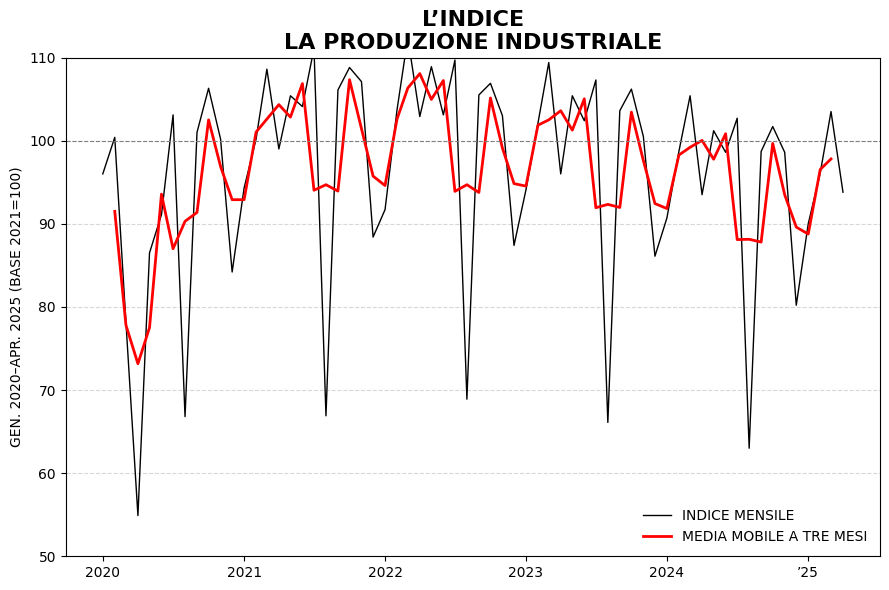

In [20]:
import matplotlib.pyplot as plt

# Imposta indice temporale
df["time_code"] = pd.to_datetime(df["time_code"])
df = df.set_index("time_code").sort_index()


# Media mobile centrata
df["media_mobile"] = df["value"].rolling(3, center=True).mean()

# Filtro periodo
df = df["2020-01":"2025-04"]

# Plot
plt.figure(figsize=(9, 6))
plt.plot(df.index, df["value"], color="black", linewidth=1, label="INDICE MENSILE")
plt.plot(df.index, df["media_mobile"], color="red", linewidth=2, label="MEDIA MOBILE A TRE MESI")
plt.axhline(100, color="gray", linestyle="--", linewidth=0.8)
plt.ylim(50, 110)

# Titoli e assi
plt.title("L’INDICE\nLA PRODUZIONE INDUSTRIALE", fontsize=16, fontweight="bold")
plt.ylabel("GEN. 2020–APR. 2025 (BASE 2021=100)", fontsize=10)

# Etichette anni
plt.xticks(
    pd.date_range(start="2020-01", end="2025-05", freq="YS"),
    [str(y) if y < 2025 else "’25" for y in range(2020, 2026)]
)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(frameon=False, loc="lower right")
plt.tight_layout()
plt.show()


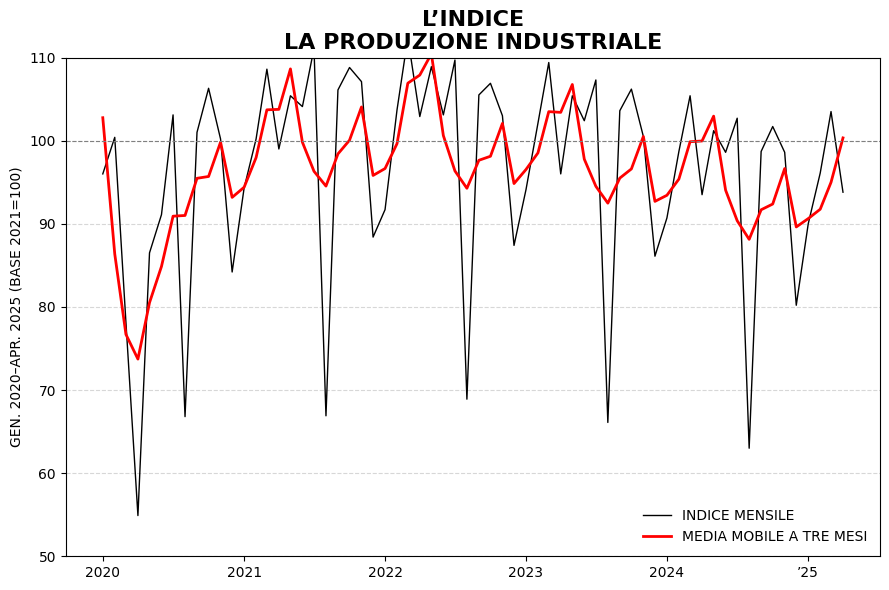

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Conversione colonna temporale e indicizzazione
df.index = pd.to_datetime(df.index)
df = df.sort_index()
# Filtro periodo
df = df["2020-01":"2025-04"]

# Applichiamo Savitzky-Golay per "lisciare" la curva rossa
# Finestra di 7 mesi (dispari), ordine polinomiale 2
df["media_mobile"] = savgol_filter(df["value"], window_length=7, polyorder=2)

# Plot
plt.figure(figsize=(9, 6))
plt.plot(df.index, df["value"], color="black", linewidth=1, label="INDICE MENSILE")
plt.plot(df.index, df["media_mobile"], color="red", linewidth=2, label="MEDIA MOBILE A TRE MESI")
plt.axhline(100, color="gray", linestyle="--", linewidth=0.8)
plt.ylim(50, 110)

# Titoli e asse
plt.title("L’INDICE\nLA PRODUZIONE INDUSTRIALE", fontsize=16, fontweight="bold")
plt.ylabel("GEN. 2020–APR. 2025 (BASE 2021=100)", fontsize=10)

# Etichette anni come nel grafico ISTAT
plt.xticks(
    pd.date_range(start="2020-01", end="2025-05", freq="YS"),
    [str(y) if y < 2025 else "’25" for y in range(2020, 2026)]
)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(frameon=False, loc="lower right")
plt.tight_layout()
plt.show()


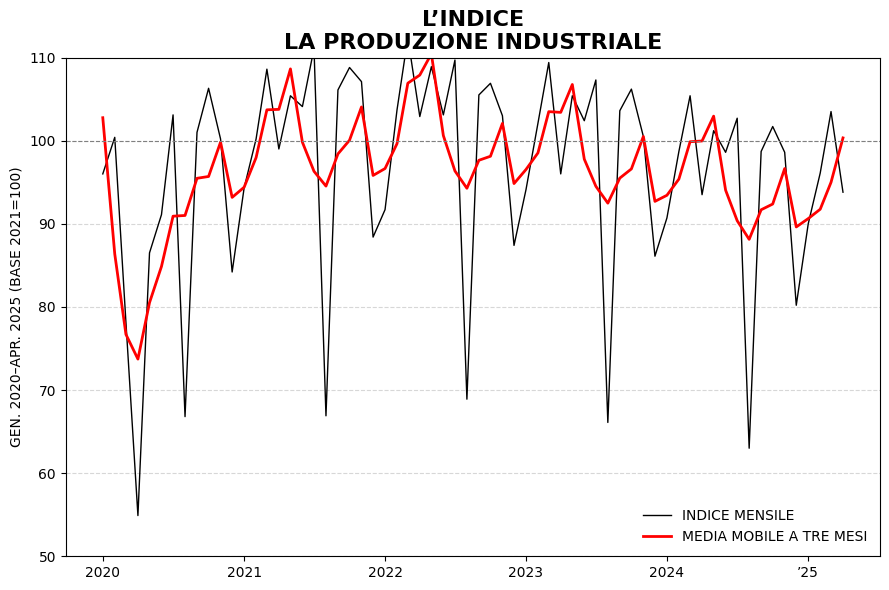

In [24]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Assumendo che time_code sia già l'indice
df.index = pd.to_datetime(df.index)
df = df.sort_index()

# Filtro periodo
df = df["2020-01":"2025-04"]

# Savitzky-Golay filter per ammorbidire la linea
df["media_mobile"] = savgol_filter(df["value"], window_length=7, polyorder=2)

# Plot
plt.figure(figsize=(9, 6))
plt.plot(df.index, df["value"], color="black", linewidth=1, label="INDICE MENSILE")
plt.plot(df.index, df["media_mobile"], color="red", linewidth=2, label="MEDIA MOBILE A TRE MESI")
plt.axhline(100, color="gray", linestyle="--", linewidth=0.8)
plt.ylim(50, 110)

plt.title("L’INDICE\nLA PRODUZIONE INDUSTRIALE", fontsize=16, fontweight="bold")
plt.ylabel("GEN. 2020–APR. 2025 (BASE 2021=100)", fontsize=10)

plt.xticks(
    pd.date_range(start="2020-01", end="2025-05", freq="YS"),
    [str(y) if y < 2025 else "’25" for y in range(2020, 2026)]
)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(frameon=False, loc="lower right")
plt.tight_layout()
plt.show()


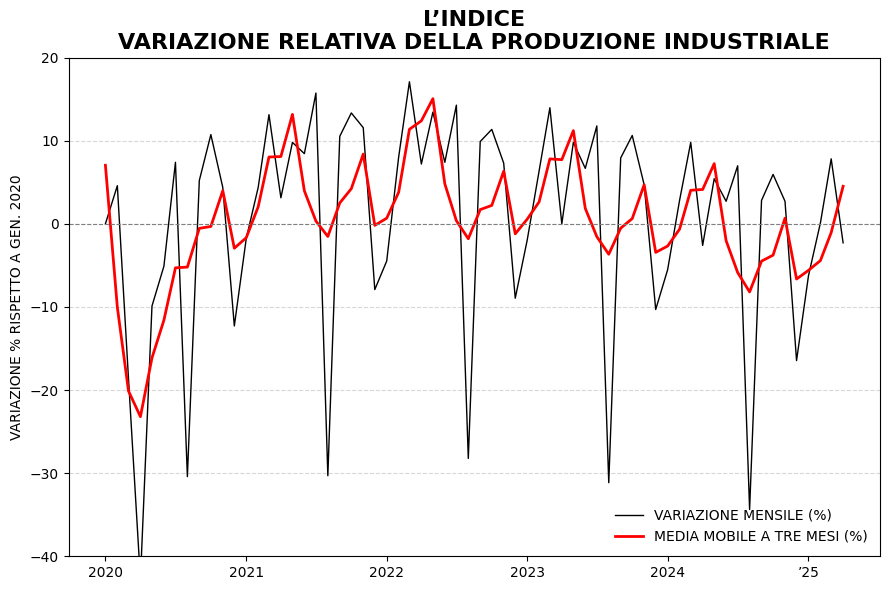

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Conversione colonna temporale e indicizzazione
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df = df["2020-01":"2025-04"]

# Calcolo variazione % rispetto al primo valore
base_value = df["value"].iloc[0]
df["var_pct"] = (df["value"] - base_value) / base_value * 100

# Media mobile lisciata
df["media_mobile"] = savgol_filter(df["var_pct"], window_length=7, polyorder=2)

# Plot
plt.figure(figsize=(9, 6))
plt.plot(df.index, df["var_pct"], color="black", linewidth=1, label="VARIAZIONE MENSILE (%)")
plt.plot(df.index, df["media_mobile"], color="red", linewidth=2, label="MEDIA MOBILE A TRE MESI (%)")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.ylim(-40, 20)

plt.title("L’INDICE\nVARIAZIONE RELATIVA DELLA PRODUZIONE INDUSTRIALE", fontsize=16, fontweight="bold")
plt.ylabel("VARIAZIONE % RISPETTO A GEN. 2020", fontsize=10)

plt.xticks(
    pd.date_range(start="2020-01", end="2025-05", freq="YS"),
    [str(y) if y < 2025 else "’25" for y in range(2020, 2026)]
)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(frameon=False, loc="lower right")
plt.tight_layout()
plt.show()


## lisciatura

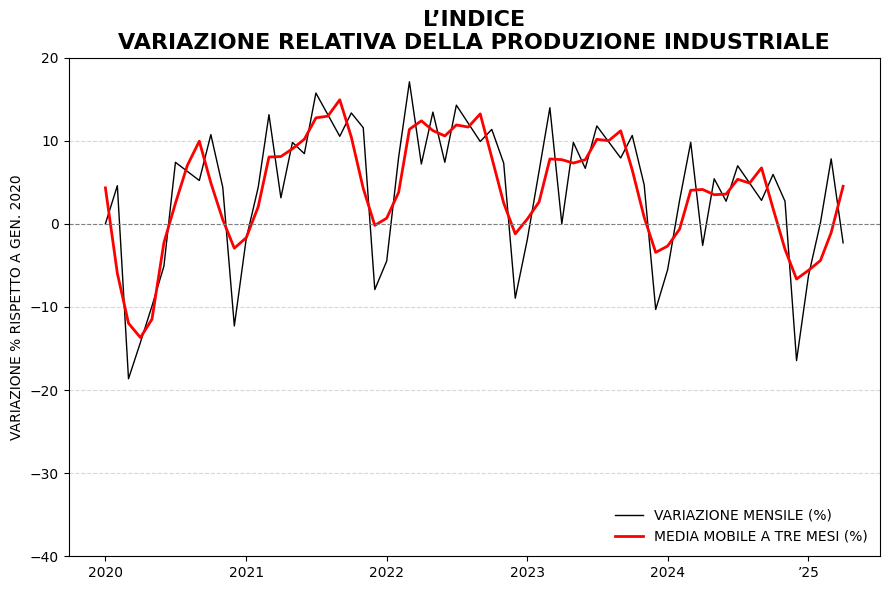

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# 1. Prepara l'indice temporale e filtra il periodo
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df = df["2020-01":"2025-04"]

# 2. Calcola variazione % rispetto a gennaio 2020
base_value = df["value"].iloc[0]
df["var_pct"] = (df["value"] - base_value) / base_value * 100

# 3. Identifica outlier oltre ±2.5 deviazioni standard
mean = df["var_pct"].mean()
std = df["var_pct"].std()
threshold = 1.5
mask_outlier = (df["var_pct"] < mean - threshold * std) | (df["var_pct"] > mean + threshold * std)

# 4. Sostituisce outlier con NaN e interpola linearmente
df.loc[mask_outlier, "var_pct"] = pd.NA
df["var_pct"] = df["var_pct"].interpolate(method="linear", limit_direction="both")

# 5. Applica Savitzky-Golay filter alla serie interpolata
df["media_mobile"] = savgol_filter(df["var_pct"], window_length=7, polyorder=2)

# 6. Plot
plt.figure(figsize=(9, 6))
plt.plot(df.index, df["var_pct"], color="black", linewidth=1, label="VARIAZIONE MENSILE (%)")
plt.plot(df.index, df["media_mobile"], color="red", linewidth=2, label="MEDIA MOBILE A TRE MESI (%)")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
plt.ylim(-40, 20)

plt.title("L’INDICE\nVARIAZIONE RELATIVA DELLA PRODUZIONE INDUSTRIALE", fontsize=16, fontweight="bold")
plt.ylabel("VARIAZIONE % RISPETTO A GEN. 2020", fontsize=10)

plt.xticks(
    pd.date_range(start="2020-01", end="2025-05", freq="YS"),
    [str(y) if y < 2025 else "’25" for y in range(2020, 2026)]
)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(frameon=False, loc="lower right")
plt.tight_layout()
plt.show()


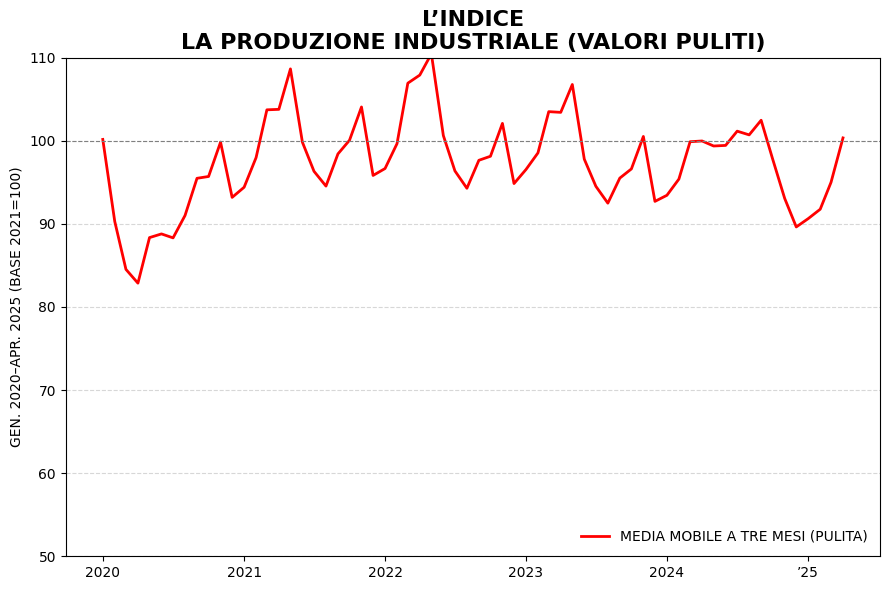

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# 1. Imposta indice temporale e filtra il periodo
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df = df["2020-01":"2025-04"]

# 2. Rileva outlier nella serie assoluta "value"
mean = df["value"].mean()
std = df["value"].std()
threshold = 2.5
mask_outlier = (df["value"] < mean - threshold * std) | (df["value"] > mean + threshold * std)

# 3. Sostituisci gli outlier con NaN e interpola linearmente
df["value_clean"] = df["value"].mask(mask_outlier)
df["value_clean"] = df["value_clean"].interpolate(method="linear", limit_direction="both")

# 4. Applica Savitzky-Golay filter ai valori interpolati
df["media_mobile"] = savgol_filter(df["value_clean"], window_length=7, polyorder=2)

# 5. Plot
plt.figure(figsize=(9, 6))
# plt.plot(df.index, df["value"], color="black", linewidth=1, label="INDICE MENSILE (ORIGINALE)")
plt.plot(df.index, df["media_mobile"], color="red", linewidth=2, label="MEDIA MOBILE A TRE MESI (PULITA)")
plt.axhline(100, color="gray", linestyle="--", linewidth=0.8)
plt.ylim(50, 110)

plt.title("L’INDICE\nLA PRODUZIONE INDUSTRIALE (VALORI PULITI)", fontsize=16, fontweight="bold")
plt.ylabel("GEN. 2020–APR. 2025 (BASE 2021=100)", fontsize=10)

plt.xticks(
    pd.date_range(start="2020-01", end="2025-05", freq="YS"),
    [str(y) if y < 2025 else "’25" for y in range(2020, 2026)]
)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(frameon=False, loc="lower right")
plt.tight_layout()
plt.show()


<positron-console-cell-12>:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


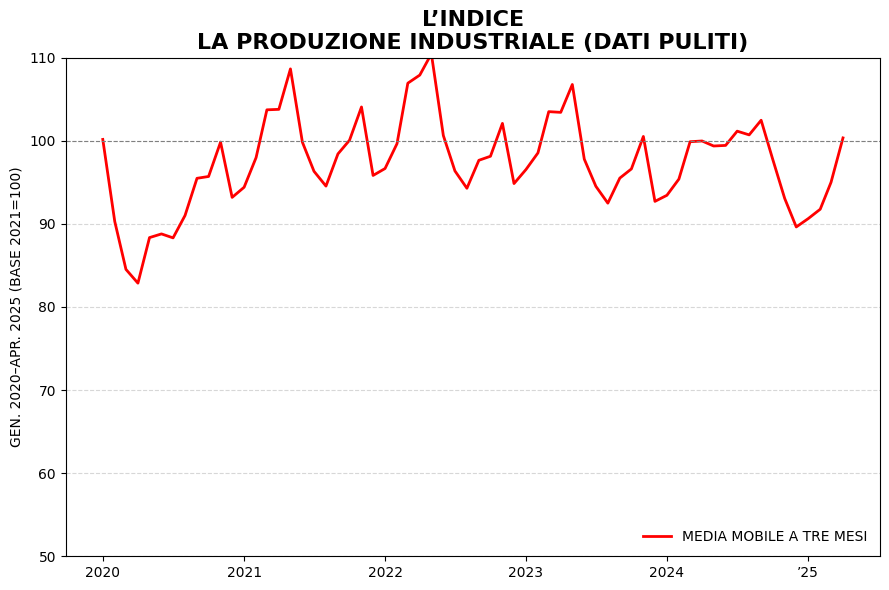

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# 1. Prepara indice e filtra periodo
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df = df["2020-01":"2025-04"]

# 2. Rimuovi valori anomali (outlier forti)
mean = df["value"].mean()
std = df["value"].std()
threshold = 2.5

# Individua outlier
is_outlier = (df["value"] < mean - threshold * std) | (df["value"] > mean + threshold * std)

# Sostituisci con NaN e interpola
df["value_clean"] = df["value"].mask(is_outlier)
df["value_clean"] = df["value_clean"].interpolate(method="linear", limit_direction="both")

# Verifica che non ci siano più NaN (può capitare ai bordi)
df["value_clean"] = df["value_clean"].fillna(method="bfill").fillna(method="ffill")

# 3. Applica smoothing (Savitzky-Golay)
df["media_mobile"] = savgol_filter(df["value_clean"], window_length=7, polyorder=2)

# 4. Plot solo linea pulita
plt.figure(figsize=(9, 6))
plt.plot(df.index, df["media_mobile"], color="red", linewidth=2, label="MEDIA MOBILE A TRE MESI")
plt.axhline(100, color="gray", linestyle="--", linewidth=0.8)
plt.ylim(50, 110)

plt.title("L’INDICE\nLA PRODUZIONE INDUSTRIALE (DATI PULITI)", fontsize=16, fontweight="bold")
plt.ylabel("GEN. 2020–APR. 2025 (BASE 2021=100)", fontsize=10)

plt.xticks(
    pd.date_range(start="2020-01", end="2025-05", freq="YS"),
    [str(y) if y < 2025 else "’25" for y in range(2020, 2026)]
)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(frameon=False, loc="lower right")
plt.tight_layout()
plt.show()


<positron-console-cell-13>:23: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.


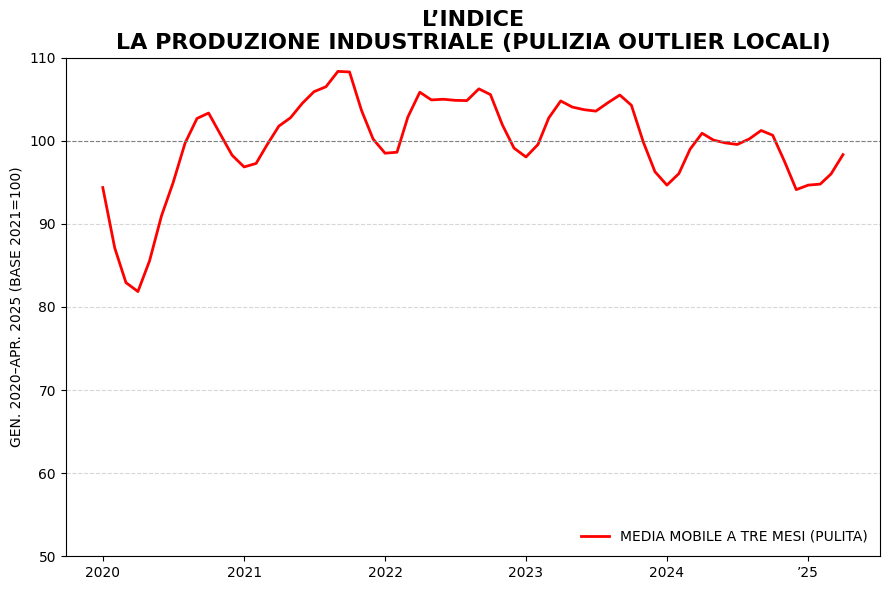

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# 1. Imposta indice e periodo
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df = df["2020-01":"2025-04"]

# 2. Calcola media mobile su 3 mesi centrata (valori grezzi)
df["rolling"] = df["value"].rolling(window=3, center=True).mean()

# 3. Rileva outlier locali: scostamento > soglia
soglia = 6  # puoi provare 5, 6, 7 punti
scostamento = (df["value"] - df["rolling"]).abs()
is_outlier_local = scostamento > soglia

# 4. Sostituisci con NaN solo dove c'è scostamento anomalo
df["value_clean"] = df["value"].mask(is_outlier_local)

# 5. Interpola i valori anomali
df["value_clean"] = df["value_clean"].interpolate(method="linear", limit_direction="both")
df["value_clean"] = df["value_clean"].fillna(method="bfill").fillna(method="ffill")

# 6. Applica smoothing (Savitzky-Golay)
df["media_mobile"] = savgol_filter(df["value_clean"], window_length=7, polyorder=2)

# 7. Plot finale
plt.figure(figsize=(9, 6))
plt.plot(df.index, df["media_mobile"], color="red", linewidth=2, label="MEDIA MOBILE A TRE MESI (PULITA)")
plt.axhline(100, color="gray", linestyle="--", linewidth=0.8)
plt.ylim(50, 110)

plt.title("L’INDICE\nLA PRODUZIONE INDUSTRIALE (PULIZIA OUTLIER LOCALI)", fontsize=16, fontweight="bold")
plt.ylabel("GEN. 2020–APR. 2025 (BASE 2021=100)", fontsize=10)

plt.xticks(
    pd.date_range(start="2020-01", end="2025-05", freq="YS"),
    [str(y) if y < 2025 else "’25" for y in range(2020, 2026)]
)

plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(frameon=False, loc="lower right")
plt.tight_layout()
plt.show()


In [17]:
df['nace_r2_label'].unique()

array(['Mining and quarrying; manufacturing; electricity, gas, steam and air conditioning supply'],
      dtype=object)

In [33]:
df_nace = fetch_eurostat_data("sts_inpr_m", {
        "geo": "IT",
        "unit": "I21",
        "s_adj": "CA",
        "nace_r2": ["C", "B-D", "B-E"],
    })

In [40]:
df_nace[['nace_r2_code', 'time_code','value']]

,nace_r2_code,time_code,value
0,B-D,1990-01,102.5
1,B-D,1990-02,108.1
2,B-D,1990-03,117.6
3,B-D,1990-04,107.4
4,B-D,1990-05,114.3
...,...,...,...
843,C,2024-12,77.3
844,C,2025-01,88.1
845,C,2025-02,95.1
846,C,2025-03,104.0


In [43]:
# 1. Converti 'time_code' in datetime
df_nace["time_code"] = pd.to_datetime(df_nace["time_code"])

# 2. Pivot per avere una colonna per ogni nace_r2_code
pivot_df = df_nace.pivot(index="time_code", columns="nace_r2_code", values="value")

# 3. Filtro periodo coerente (es. 2020–2025)
pivot_df = pivot_df["2020-01":"2025-04"]

pivot_df

nace_r2_code,B-D,C
time_code,,
2020-01-01,96.0,94.5
2020-02-01,100.4,100.6
2020-03-01,78.1,76.6
2020-04-01,54.9,52.3
2020-05-01,86.5,86.4
...,...,...
2024-12-01,80.2,77.3
2025-01-01,90.0,88.1
2025-02-01,96.1,95.1


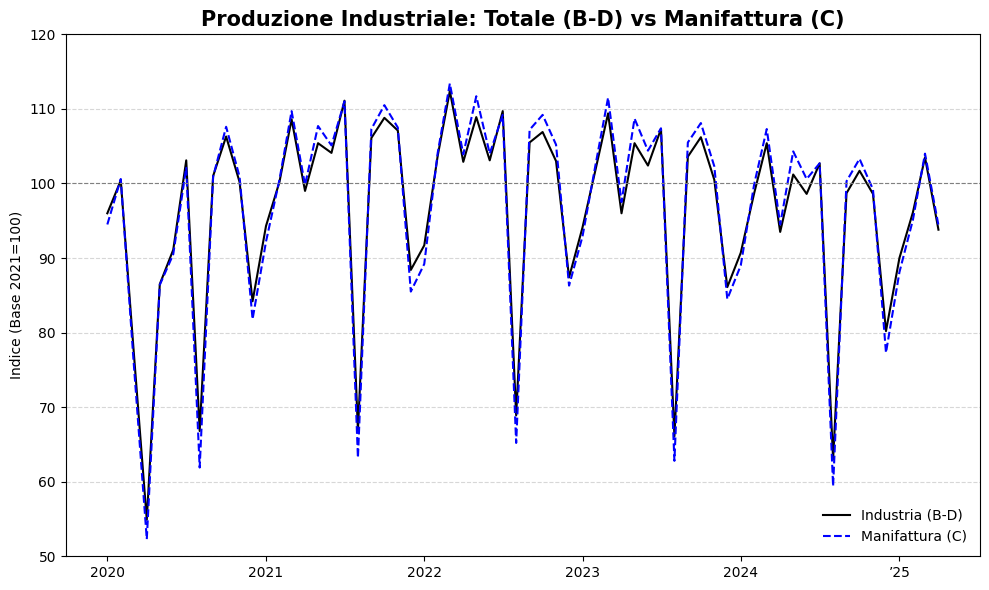

In [44]:
import matplotlib.pyplot as plt

# Line plot
plt.figure(figsize=(10, 6))
plt.plot(pivot_df.index, pivot_df["B-D"], label="Industria (B-D)", color="black", linewidth=1.5)
plt.plot(pivot_df.index, pivot_df["C"], label="Manifattura (C)", color="blue", linestyle="--", linewidth=1.5)

# Linea base 100
plt.axhline(100, color="gray", linestyle="--", linewidth=0.8)

# Titoli e stile
plt.title("Produzione Industriale: Totale (B-D) vs Manifattura (C)", fontsize=15, fontweight="bold")
plt.ylabel("Indice (Base 2021=100)")
plt.ylim(50, 120)
plt.xticks(
    pd.date_range(start="2020-01", end="2025-05", freq="YS"),
    [str(y) if y < 2025 else "’25" for y in range(2020, 2026)]
)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(frameon=False, loc="lower right")
plt.tight_layout()
plt.show()
